In [7]:
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
#procesamiento de datos
time_series = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
print ("time_series:",time_series)
train_size =int(len(time_series)*0.6)
train_data, test_data = time_series[:train_size], time_series[train_size:]
print ("train_data:",train_data)
print ("test_data:",test_data)

time_series: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
train_data: [1 2 3 4 5 6 7 8 9]
test_data: [10 11 12 13 14 15]


In [9]:
#preparacion de datos
def create_dataset (data , seq_lenght):
  X,y = [],[]
  for i in range(len(data)-seq_lenght):
    X.append(data[i:i + seq_lenght])
    y.append(data[i+seq_lenght])
  return np.array(X), np.array(y)

#definimos el numero de pasos de tiempo para la serie
seq_length = 4
X_train, y_train = create_dataset(train_data, seq_lenght)
X_test, y_test = create_dataset(test_data, seq_lenght)


#imprimimos los conjuntos
print ("conjunto de secuencias entrenamiento \n",X_train)
print ("Etiquetas de entrenamiento \n",y_train)
print ("conjunto de secuencias prueba \n",X_test)
print ("Etiqueta de prueba \n",y_test)


conjunto de secuencias entrenamiento 
 [[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]
 [5 6 7 8]]
Etiquetas de entrenamiento 
 [5 6 7 8 9]
conjunto de secuencias prueba 
 [[10 11 12 13]
 [11 12 13 14]]
Etiqueta de prueba 
 [14 15]


In [10]:
#paso 3 construccion del modelo

model = Sequential()
model.add(LSTM(16, activation='relu', input_shape=(seq_length,1)))
model.add(Dense(1))

# compilar el modelo
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 60.7193
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 60.2221
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 59.7298
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 59.2427
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 58.7582
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 58.2776
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 57.8017
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 57.3285
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 56.8579
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 56.3900
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 55.9234
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 55.4601
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 54.9996
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 54.5418
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 54.0863
Epoch 

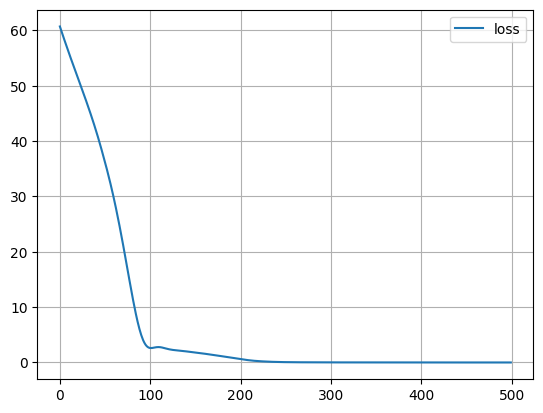

In [11]:
#entrenar el modelo
history = model.fit(X_train, y_train, epochs=500)

#graficar el modelo

pd.DataFrame(history.history).plot(grid=True)
plt.show()

#

In [12]:
#evaluacion del modelo

evaluacion=model.evaluate(X_test,y_test)
print("evaluacion del modelo",evaluacion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 0.6155
evaluacion del modelo 0.6155176162719727


In [13]:
#prediccion

print("X_test :\n",X_test)
print("y_test :\n",y_test)
y_pred =model.predict(X_test)
print ("y_pred: \n",y_pred)
#

X_test :
 [[10 11 12 13]
 [11 12 13 14]]
y_test :
 [14 15]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
y_pred: 
 [[14.719659]
 [15.844468]]
